In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/YOLO_thermal_dog_people_detection

/content/drive/MyDrive/YOLO_thermal_dog_people_detection


In [ ]:
##cloning yolov9 from github
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 147 (delta 30), reused 28 (delta 28), pack-reused 105
Receiving objects: 100% (147/147), 607.49 KiB | 10.12 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
%cd yolov9

/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9


In [ ]:
##Installing requirements file
!pip3 install -r "requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/YOLO_thermal_dog_people_detection

/content/drive/MyDrive/YOLO_thermal_dog_people_detection


In [ ]:
##Downloading weights from yolov9 github
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [4]:
%cd yolov9

/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9


In [ ]:
##train yolov9 model on my dataset
!python train_dual.py --workers 8 --batch 4 --img 640 --epoch 300 --data /content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/data.yaml --weights /content/drive/MyDrive/YOLO_thermal_dog_people_detection/weights/yolov9-e.pt --cfg /content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/models/detect/yolov9_custom.yaml --hyp /content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/data/hyps/hyp.scratch-high.yaml

2024-02-29 06:20:34.557269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 06:20:34.557324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 06:20:34.558627: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 06:20:35.618475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/drive/MyDrive/YOLO_thermal_dog_people_detection/weights/yolov9-e.pt, cfg=/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/models/detect/yolov9_custom.yaml, data=/content/drive/MyDrive/YOLO_thermal_

In [5]:
from IPython.display import Image

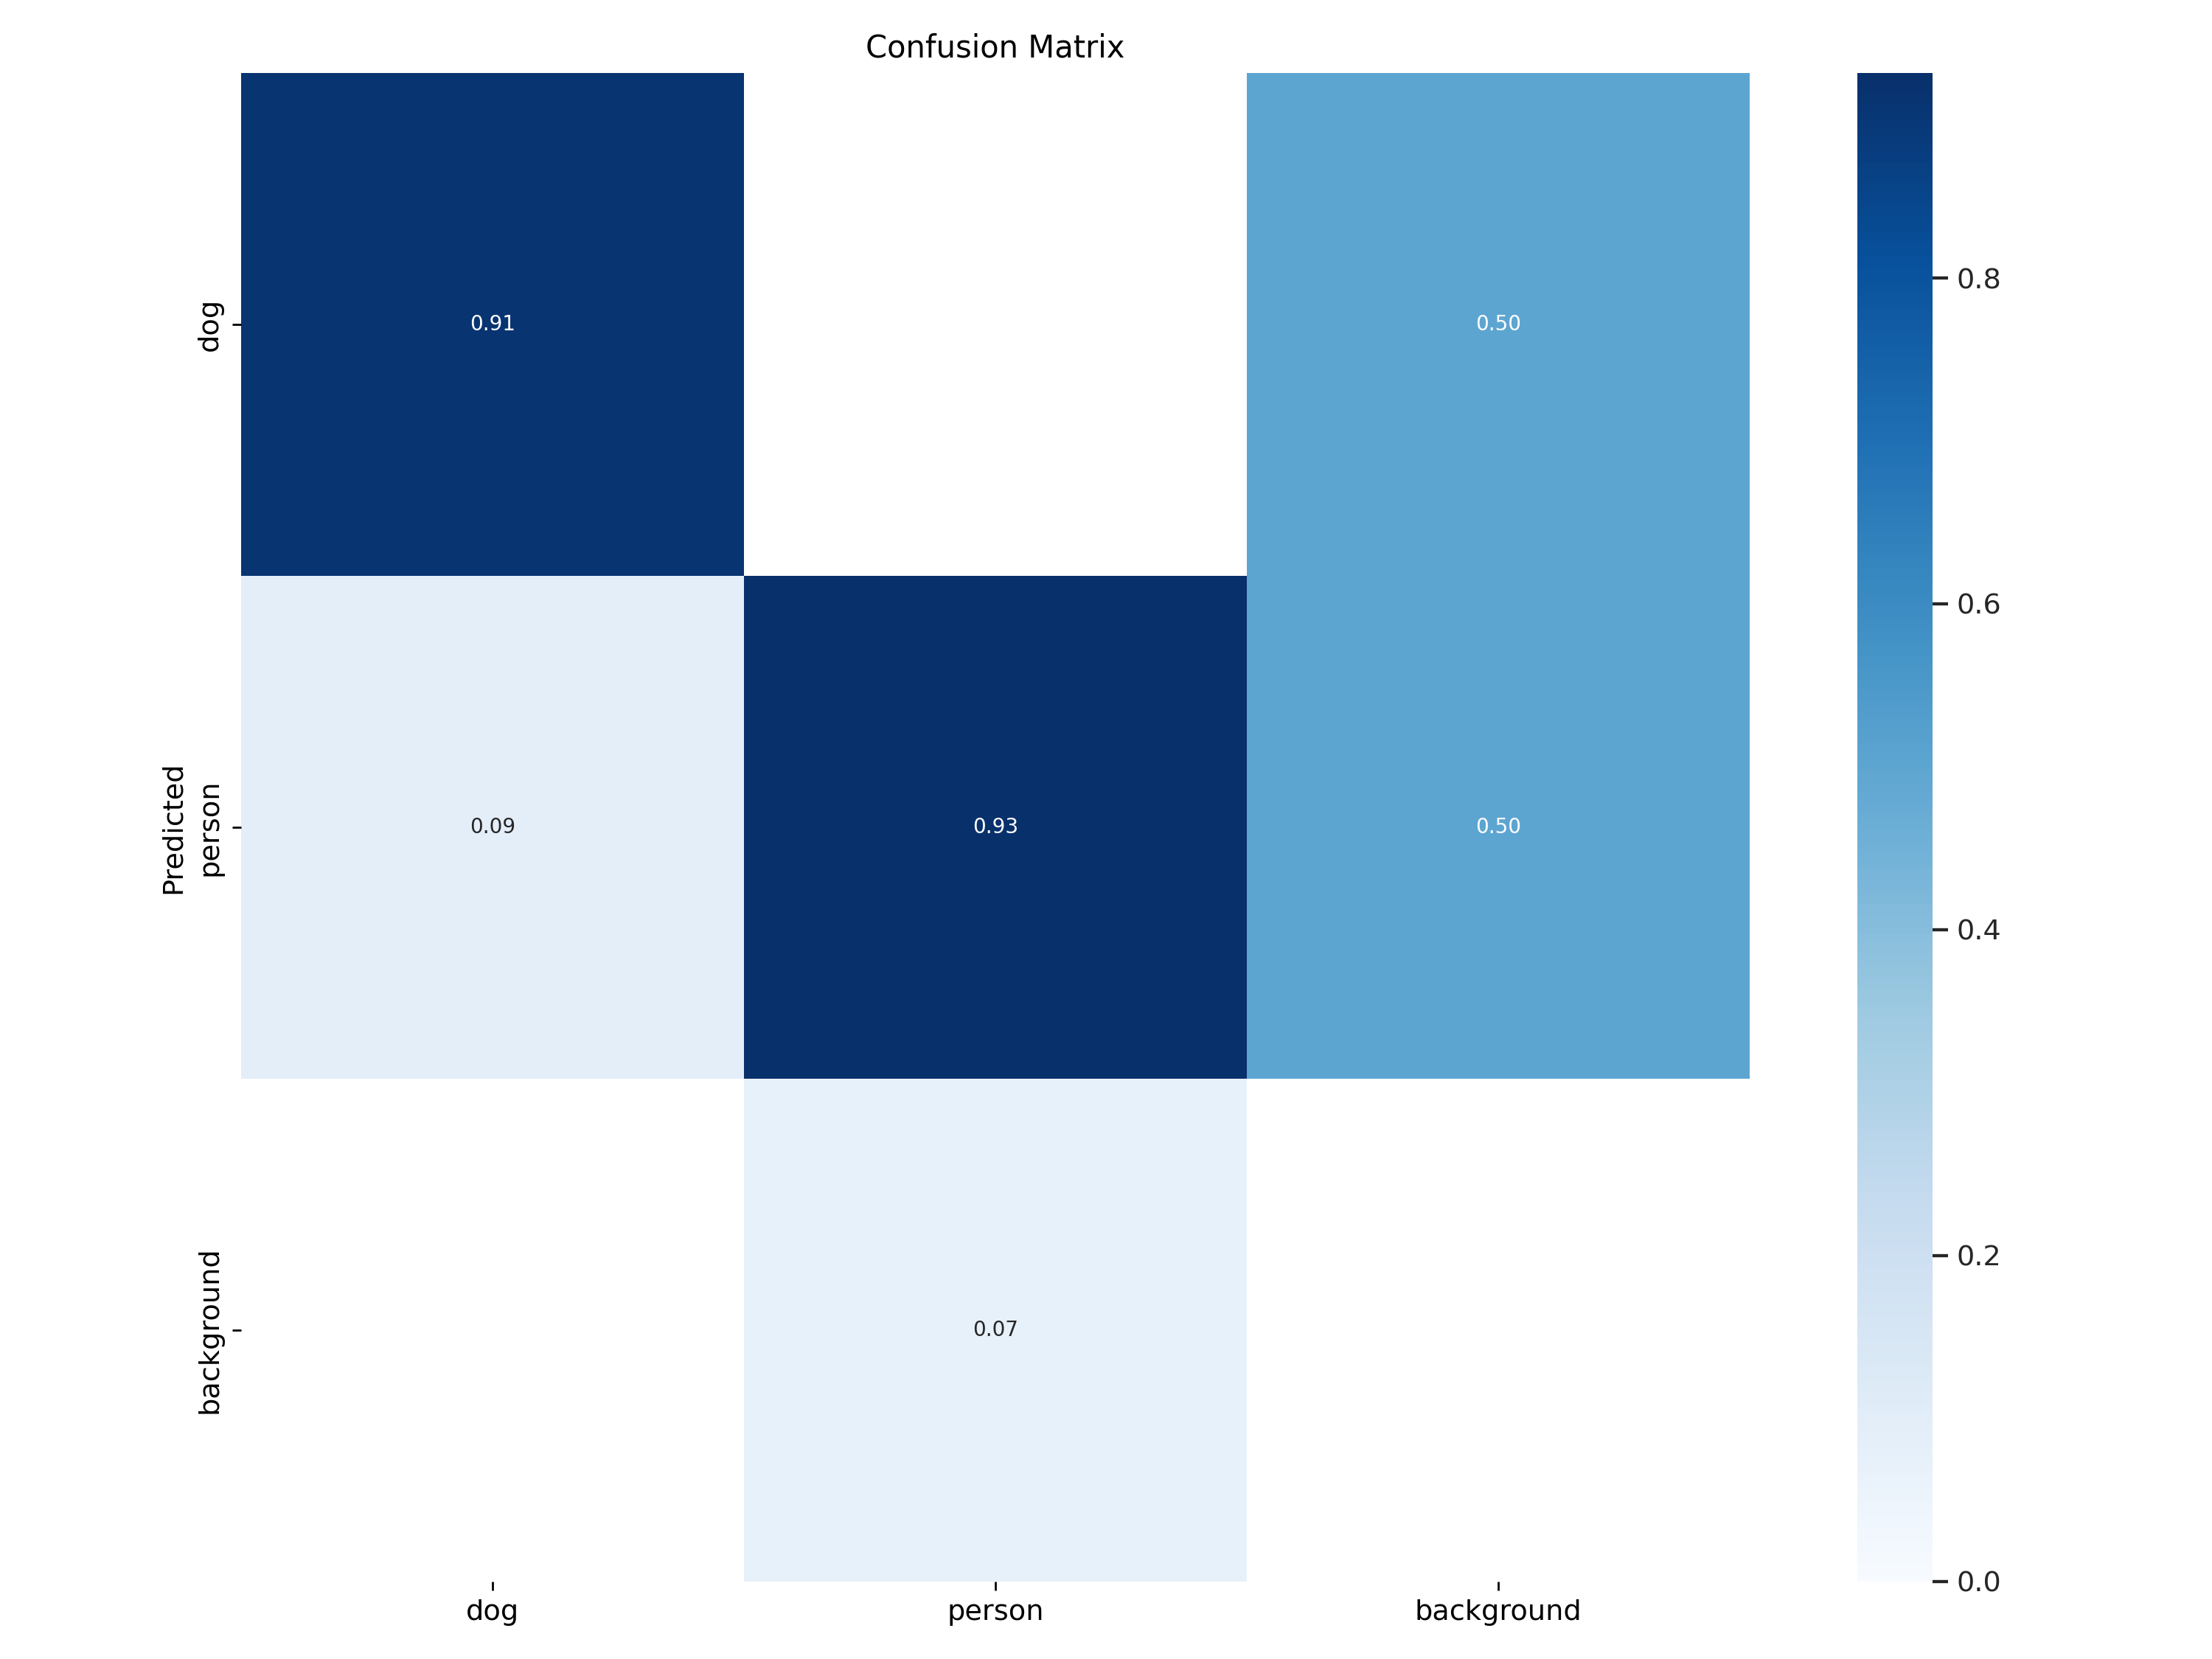

In [12]:
##Confusion Matrix
Image(filename='/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/train/exp2/confusion_matrix.png', width=1000)

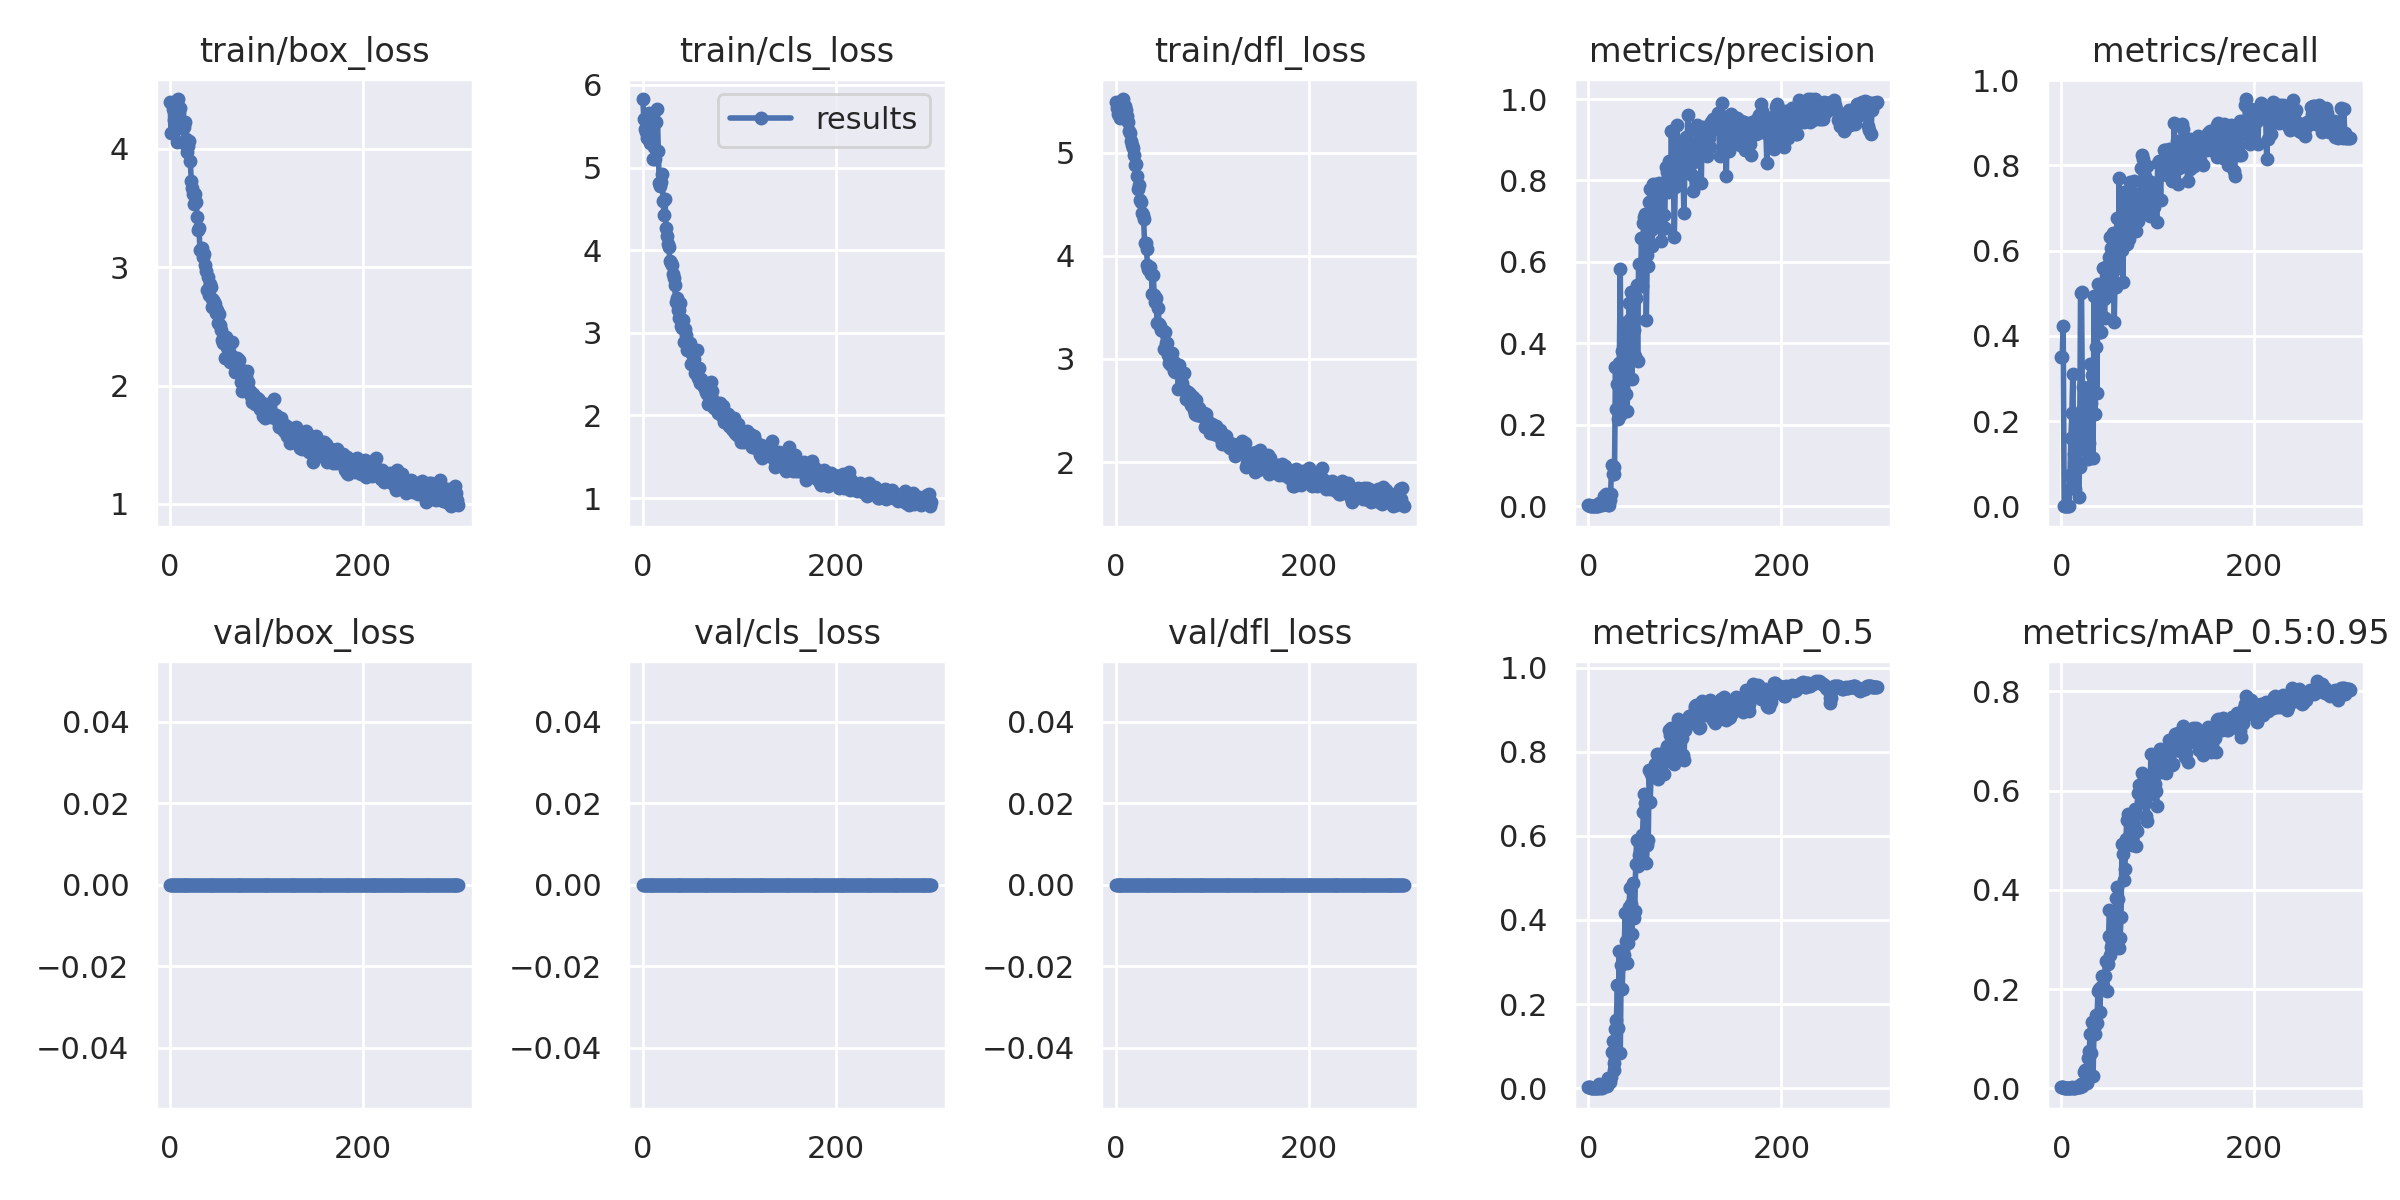

In [7]:
##Image of result Showing loss graphs and precision graph
Image(filename='/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/train/exp2/results.png', width=1000)

In the training dataset, the box loss, classification loss (cls), and detection false loss (dfl) exhibit a steady decrease over time, indicating effective learning and refinement of the model. However, in the validation dataset, these losses reach zero, suggesting optimal performance and accurate predictions without any errors.

Box(P, R, mAP50, mAP50-95): This metric provides insights into the model's performance in detecting objects:

P (Precision): The accuracy of the detected objects, indicating how many detections were correct.

R (Recall): The ability of the model to identify all instances of objects in the images.

mAP50: Mean average precision calculated at an intersection over union (IoU) threshold of 0.50. It's a measure of the model's accuracy considering only the "easy" detections.

mAP50-95: The average of the mean average precision calculated at varying IoU thresholds, ranging from 0.50 to 0.95. It gives a comprehensive view of the model's performance across different levels of detection difficulty.

In [13]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/train/exp2/results.csv")

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/cls_loss,val/dfl_loss,x/lr0,x/lr1,x/lr2
0,0,4.39850,5.82910,5.4883,0.002766,0.35101,0.002924,0.001643,0,0,0,0.070833,0.003241,0.003241
1,1,4.13290,5.58240,5.4317,0.002881,0.35101,0.004007,0.001899,0,0,0,0.040812,0.006552,0.006552
2,2,4.38370,5.47010,5.3774,0.001613,0.42340,0.004132,0.001609,0,0,0,0.010768,0.009842,0.009842
3,3,4.33300,5.43590,5.3658,0.000000,0.00000,0.000000,0.000000,0,0,0,0.009901,0.009901,0.009901
4,4,4.23930,5.35890,5.3581,0.000000,0.00000,0.000000,0.000000,0,0,0,0.009901,0.009901,0.009901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,1.15090,1.03640,1.7364,0.989900,0.86376,0.954930,0.802820,0,0,0,0.000298,0.000298,0.000298
296,296,1.07190,0.96797,1.6452,0.990810,0.86485,0.954430,0.805600,0,0,0,0.000265,0.000265,0.000265
297,297,1.09450,1.04890,1.7487,0.990710,0.86516,0.953660,0.803870,0,0,0,0.000232,0.000232,0.000232
298,298,1.03630,0.90096,1.5876,0.990890,0.86444,0.953500,0.804720,0,0,0,0.000199,0.000199,0.000199


The results in the CSV file highlight notable improvements in model performance across epochs. At the outset (epoch zero, equivalently epoch 1), the precision (P) stands at 0.002766, recall (R) at 0.35101, mean Average Precision (mAP) at 0.002924 for IoU threshold of 0.5, and mAP at 0.001643 for IoU range from 0.5 to 0.95. However, these metrics demonstrate a consistent enhancement over subsequent epochs. By epoch 300, precision (P) surges to 0.99, recall (R) to 0.86, mAP at 0.5 IoU threshold to 0.95, and mAP for the IoU range from 0.5 to 0.95 to 0.80. This progression underscores the model's advancing proficiency and efficacy in producing accurate predictions.

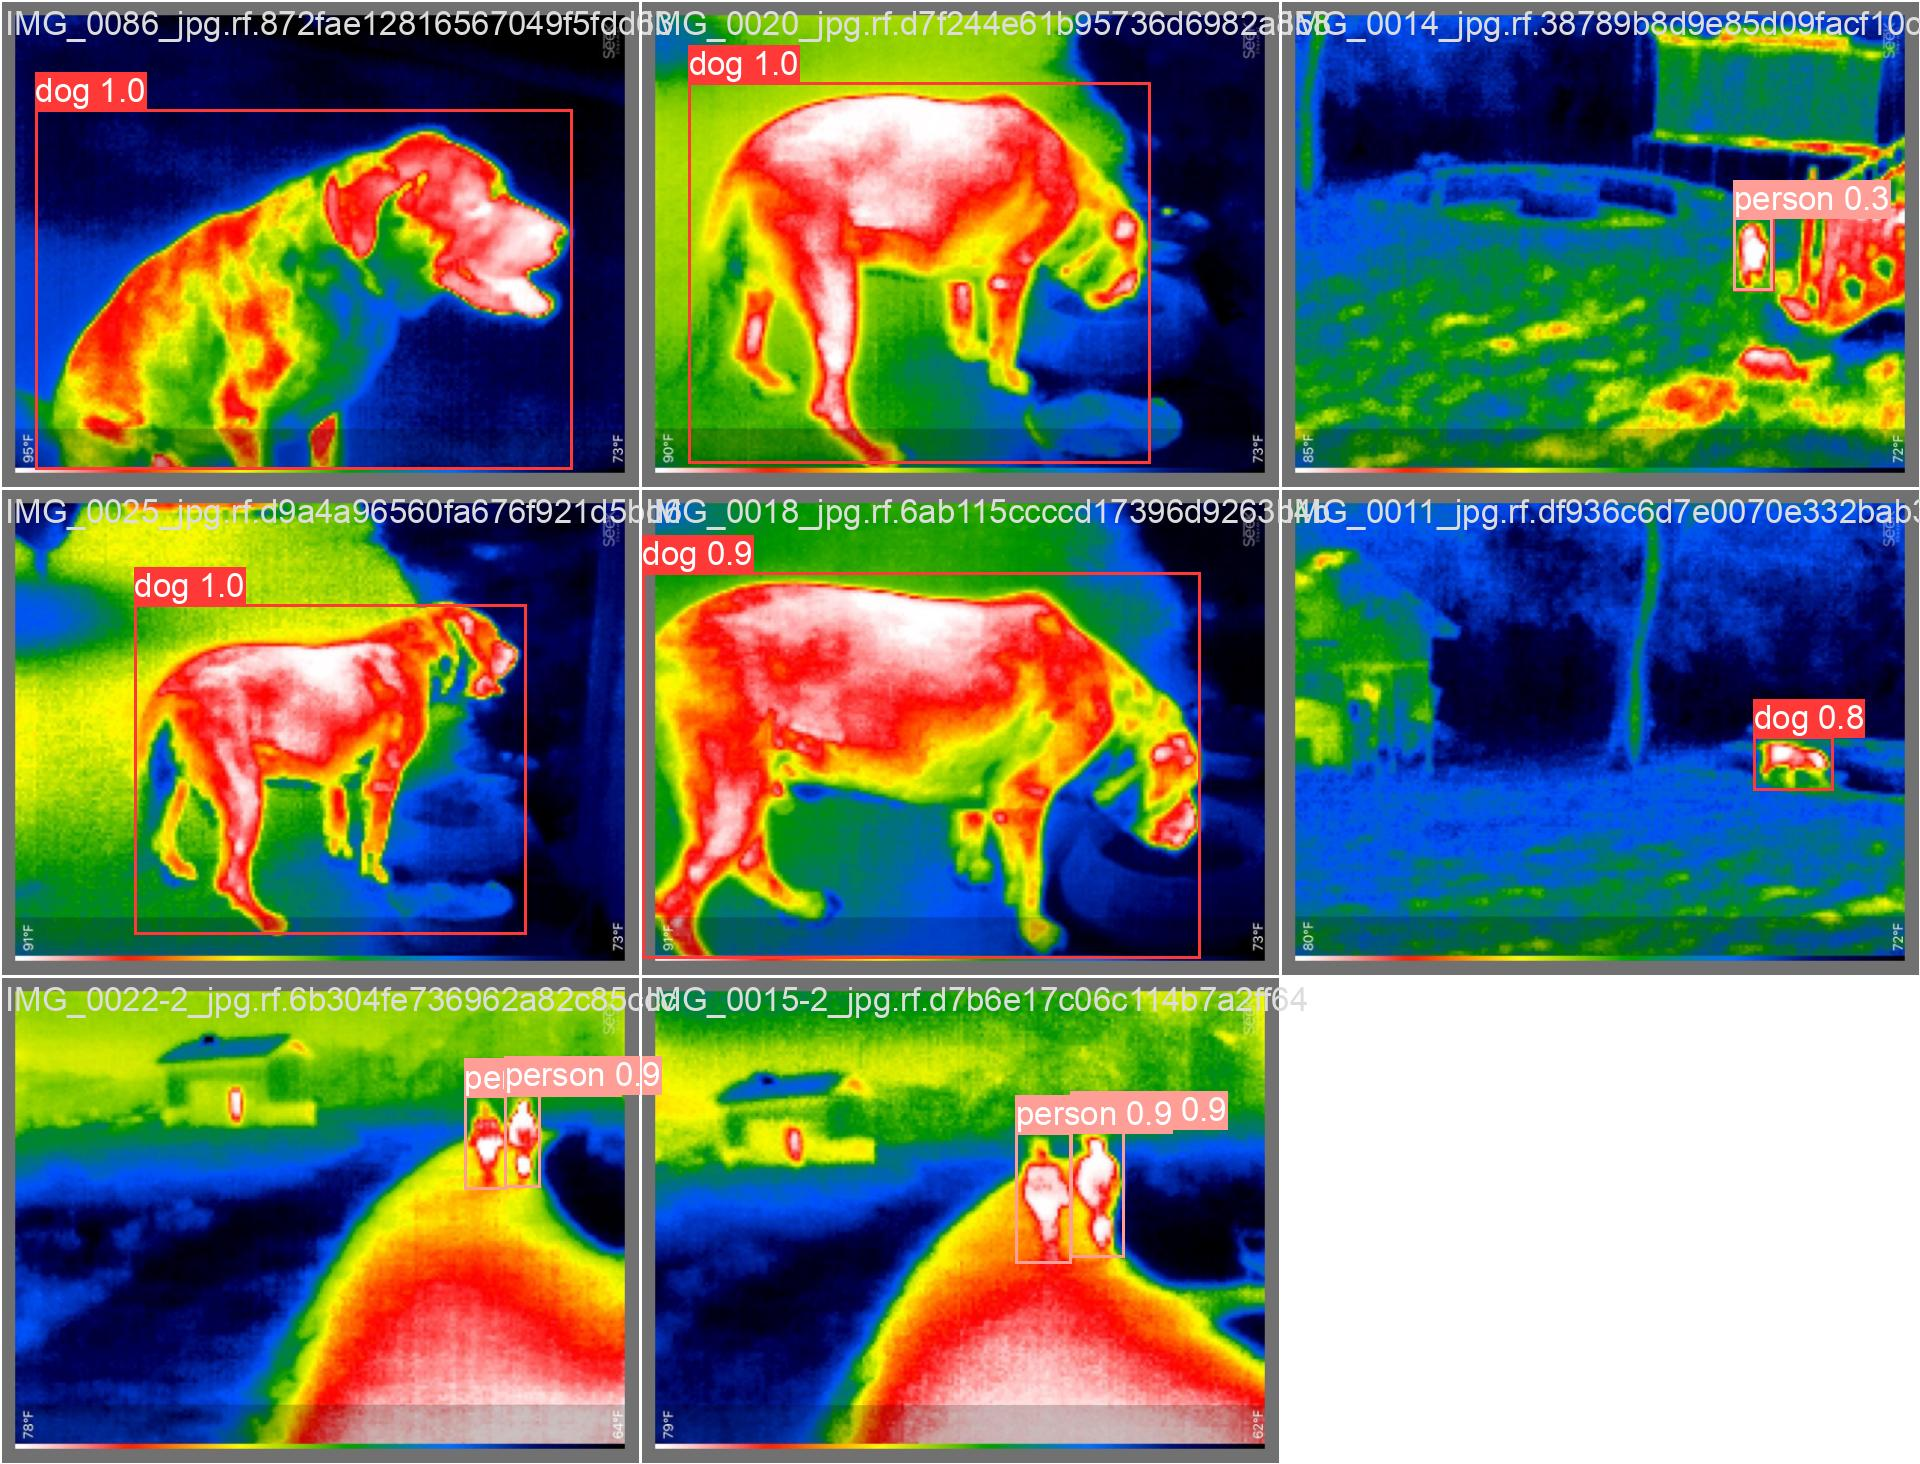

In [8]:
##Image of validation data batch 2
Image(filename='/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/train/exp2/val_batch1_pred.jpg', width=1000)

Now I am predicting my trained model on test data

In [ ]:
!python detect.py --img 1280 --conf 0.3 --weights /content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/train/exp2/weights/best.pt --source /content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/Thermal_Dogs_and_People/test/images

detect: weights=['/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/Thermal_Dogs_and_People/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9_custom summary: 700 layers, 60758572 parameters, 0 gradients, 264.9 GFLOPs
image 1/20 /content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/Thermal_Dogs_and_People/test/images/IMG_0002-4_jpg.rf.f40dcac951f2e9fade8717e27bec2e9e.jpg: 1280x960 2 persons, 185.8ms
image

Here are two images displaying the outcomes of my test data.

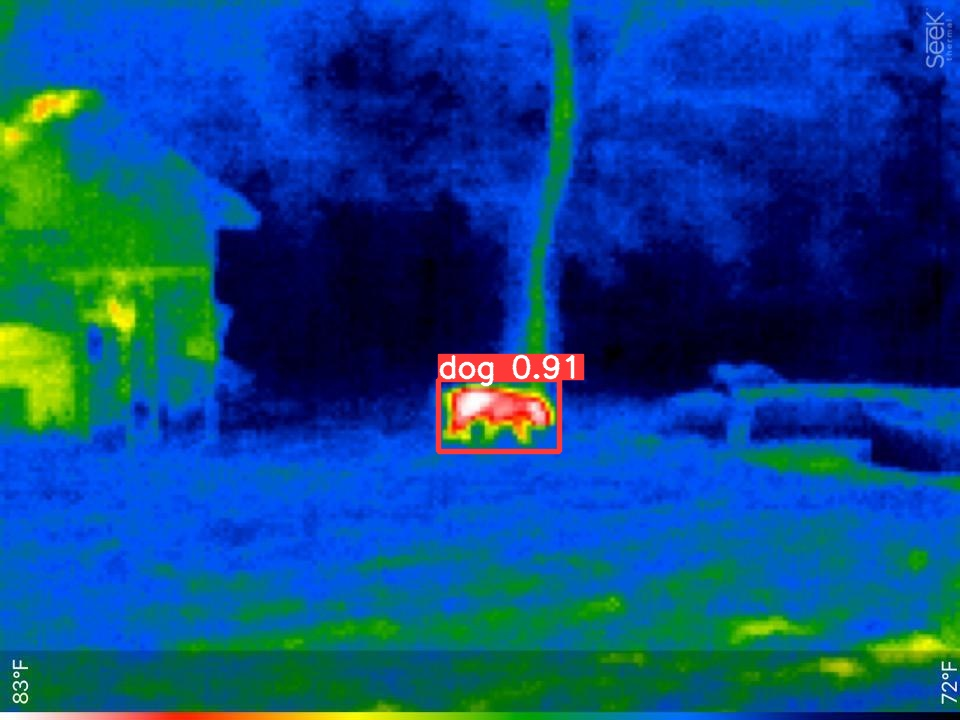

In [9]:
Image(filename='/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/detect/exp/IMG_0009_jpg.rf.4843a778e5ad0a37dc9d9eca705b8234.jpg',width=1000)

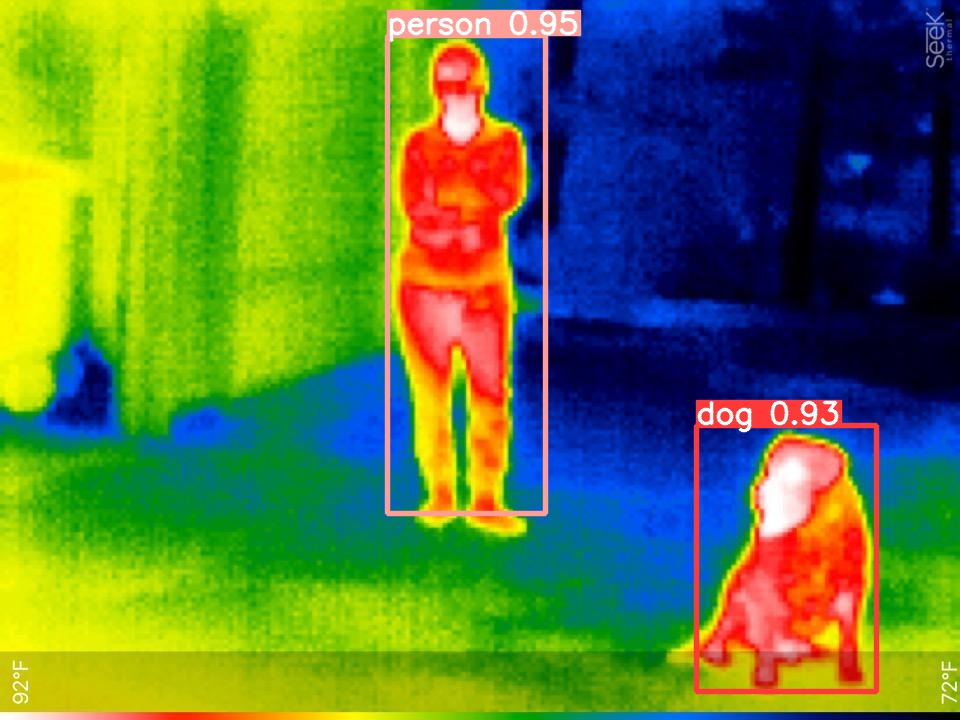

In [11]:
Image(filename='/content/drive/MyDrive/YOLO_thermal_dog_people_detection/yolov9/runs/detect/exp/IMG_0106_jpg.rf.8b99377c8156a0816488c6e96dc58497.jpg',width=1000)